In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1385


<Axes: xlabel='Time'>

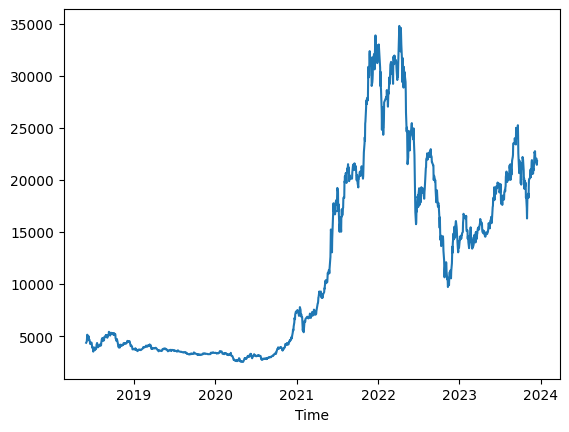

In [3]:
#2. Fetch data and visualize
VND = stock_historical_data(symbol = "VND", start_date="2018-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
VND
VND["Close"].plot()

In [4]:
VND['Lag'] = np.arange(len(VND.index))
VND = VND[['Close', 'Lag']]
VND

VND = pd.DataFrame(VND)
VND.set_index("Lag", inplace= True)
VND

,Close
Lag,
0,4370
1,4500
2,4810
3,5140
4,4890
...,...
1380,21950
1381,22050
1382,21600


In [5]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.8 * len(VND))
test_size = int(0.2 * len(VND))

train_data = VND[:train_size]
test_data = VND[train_size:]

In [6]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[22993.34777866],
       [23016.17489767],
       [23039.00201667],
       [23061.82913568],
       [23084.65625469],
       [23107.4833737 ],
       [23130.31049271],
       [23153.13761171],
       [23175.96473072],
       [23198.79184973],
       [23221.61896874],
       [23244.44608774],
       [23267.27320675],
       [23290.10032576],
       [23312.92744477],
       [23335.75456378],
       [23358.58168278],
       [23381.40880179],
       [23404.2359208 ],
       [23427.06303981],
       [23449.89015882],
       [23472.71727782],
       [23495.54439683],
       [23518.37151584],
       [23541.19863485],
       [23564.02575385],
       [23586.85287286],
       [23609.67999187],
       [23632.50711088],
       [23655.33422989],
       [23678.16134889],
       [23700.9884679 ],
       [23723.81558691],
       [23746.64270592],
       [23769.46982493],
       [23792.29694393],
       [23815.12406294],
       [23837.95118195],
       [23860.77830096],
       [23883.60541996],


In [9]:
# 6. 60 days prediction
last_index =  VND.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[29316.45974383]
 [29339.28686284]
 [29362.11398185]
 [29384.94110085]
 [29407.76821986]
 [29430.59533887]
 [29453.42245788]
 [29476.24957689]
 [29499.07669589]
 [29521.9038149 ]
 [29544.73093391]
 [29567.55805292]
 [29590.38517193]
 [29613.21229093]
 [29636.03940994]
 [29658.86652895]
 [29681.69364796]
 [29704.52076696]
 [29727.34788597]
 [29750.17500498]
 [29773.00212399]
 [29795.829243  ]
 [29818.656362  ]
 [29841.48348101]
 [29864.31060002]
 [29887.13771903]
 [29909.96483804]
 [29932.79195704]
 [29955.61907605]
 [29978.44619506]
 [30001.27331407]
 [30024.10043307]
 [30046.92755208]
 [30069.75467109]
 [30092.5817901 ]
 [30115.40890911]
 [30138.23602811]
 [30161.06314712]
 [30183.89026613]
 [30206.71738514]
 [30229.54450414]
 [30252.37162315]
 [30275.19874216]
 [30298.02586117]
 [30320.85298018]
 [30343.68009918]
 [30366.50721819]
 [30389.3343372 ]
 [30412.16145621]
 [30434.98857522]
 [30457.81569422]
 [30480.64281323]
 [30503.46993224]

In [10]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 8839.036298856034
Testing MAPE: 53.19988017196923
Testing MAE: 8608.40355914153


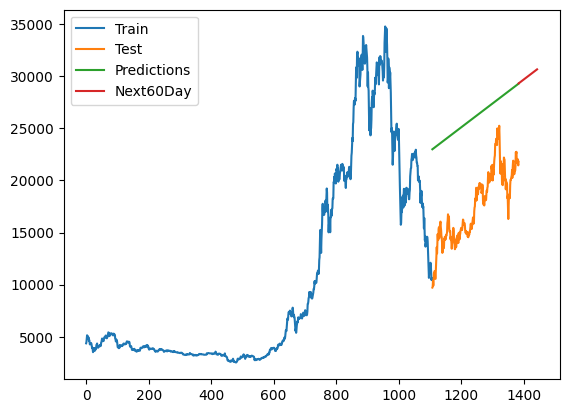

In [11]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()